Ques-2
Task-A


Processing language: Urdu
------------------------------


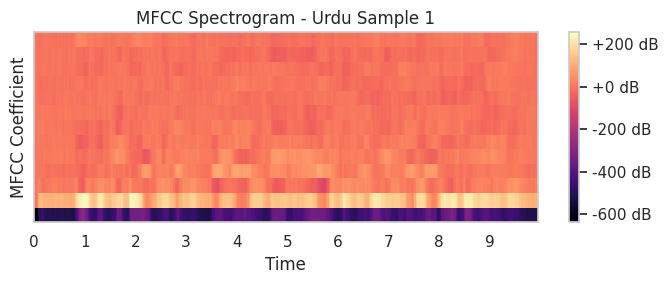

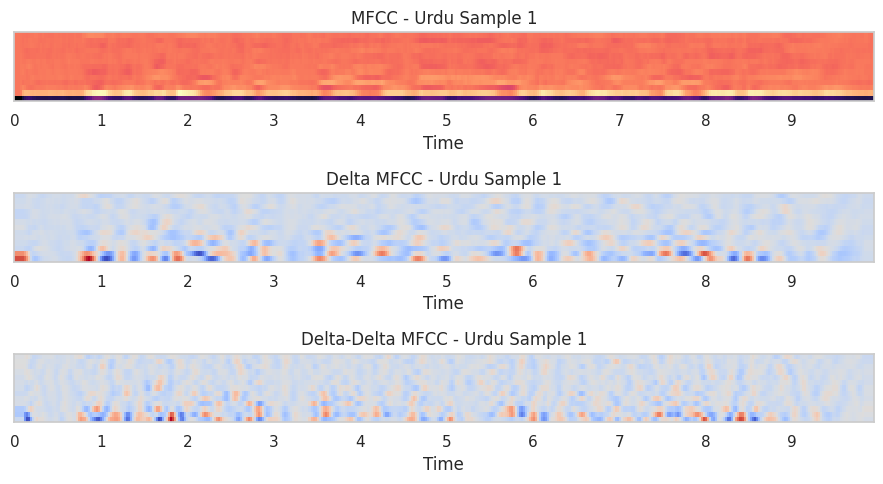

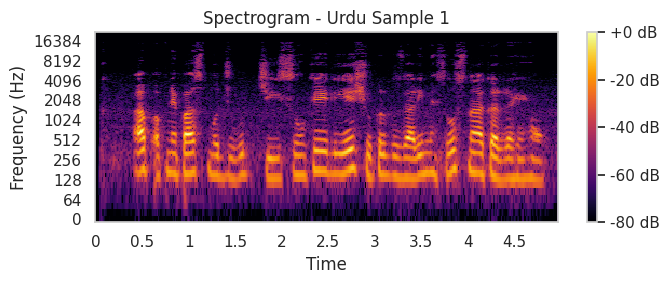

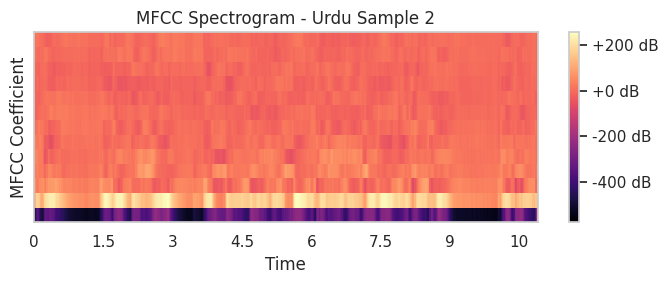

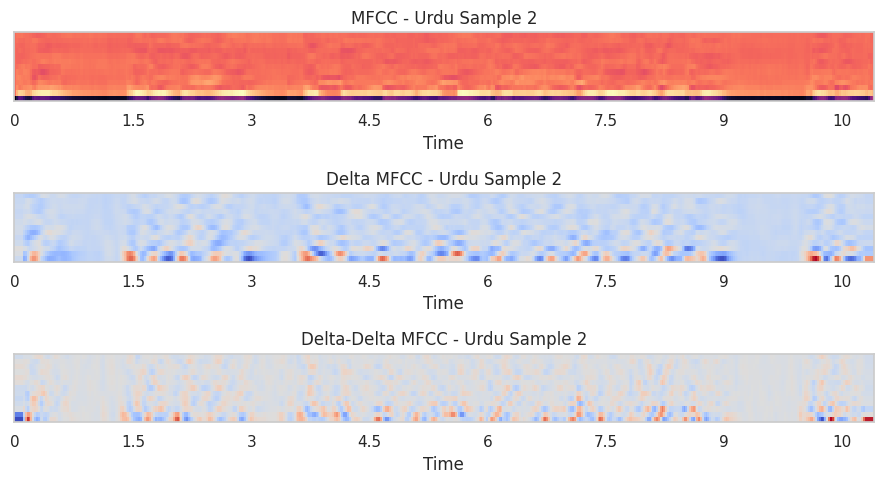

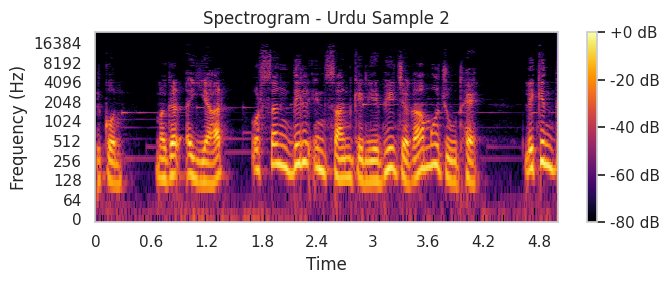

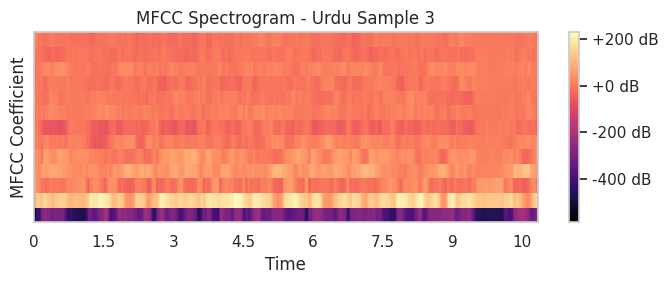

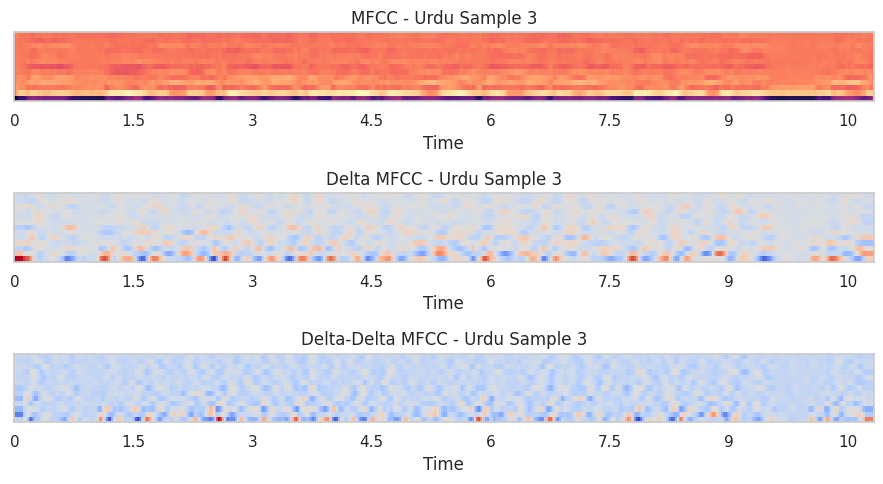

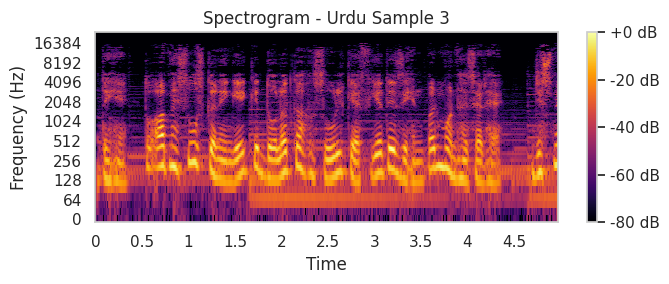


Processing language: Tamil
------------------------------


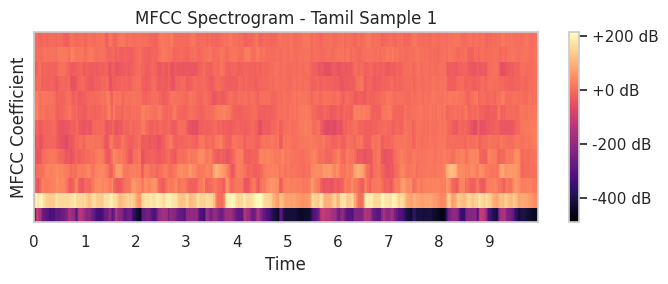

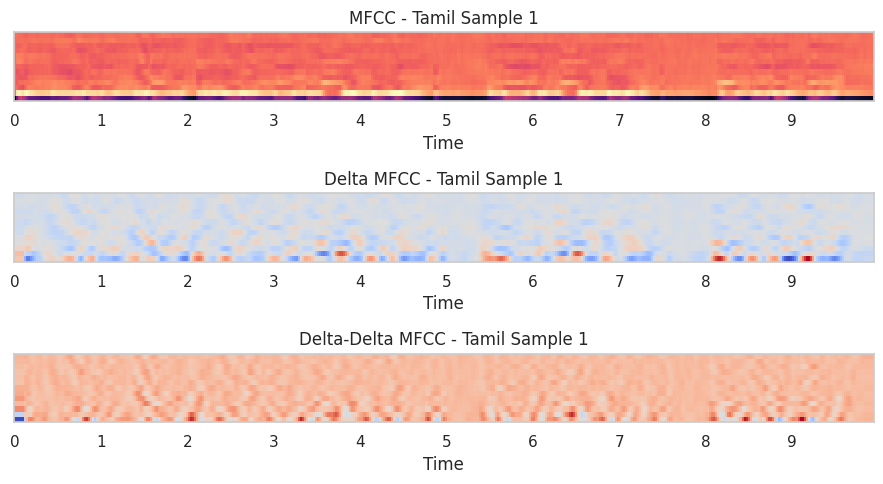

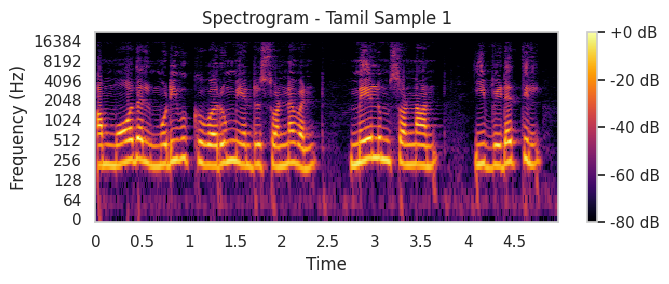

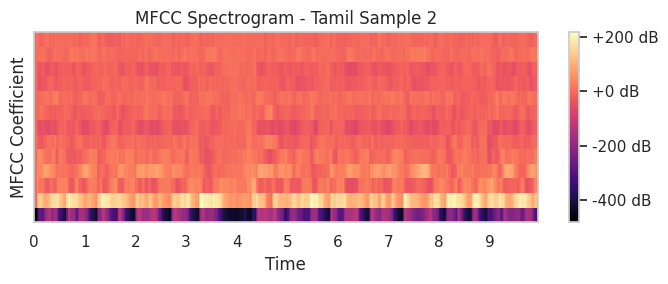

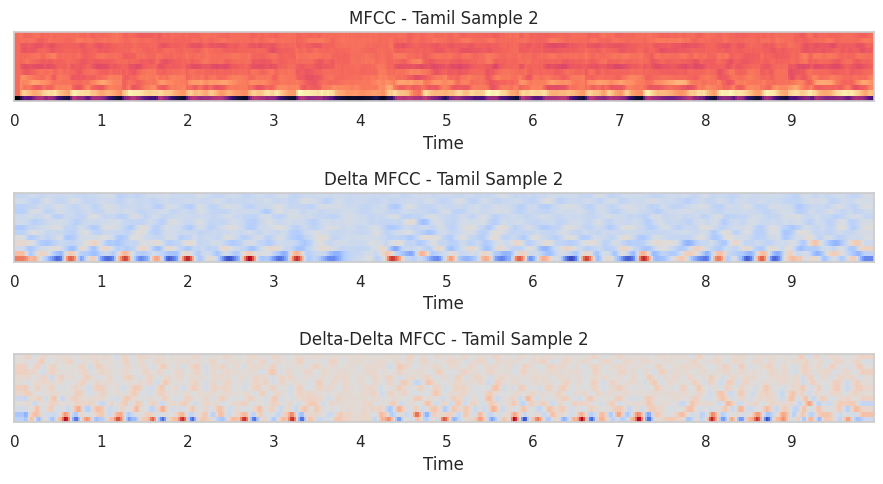

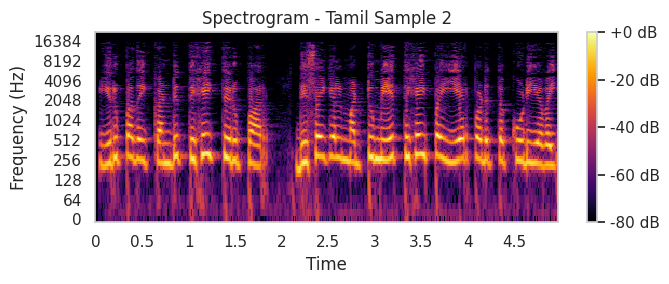

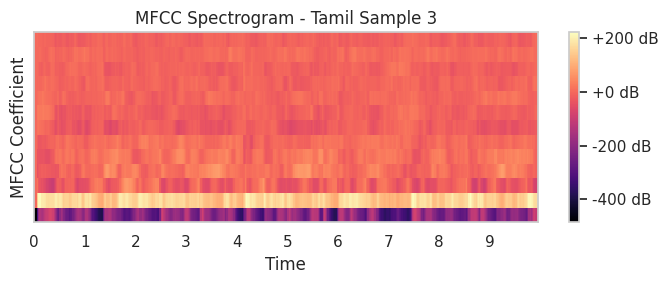

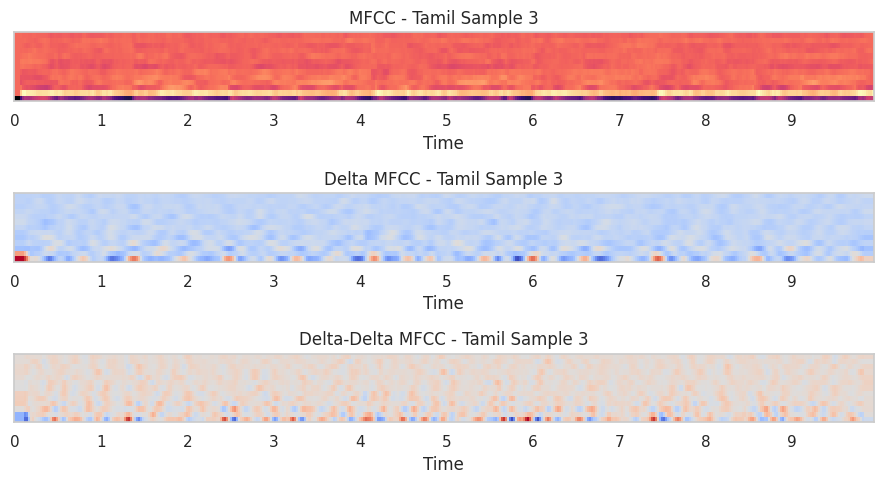

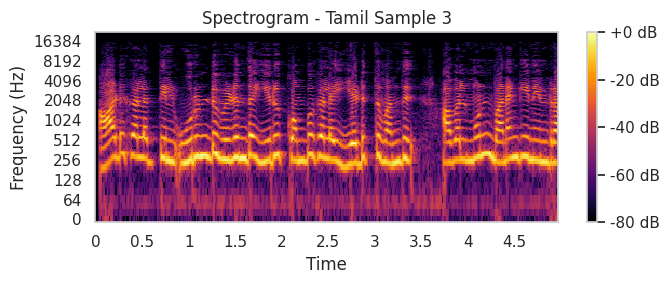


Processing language: Marathi
------------------------------


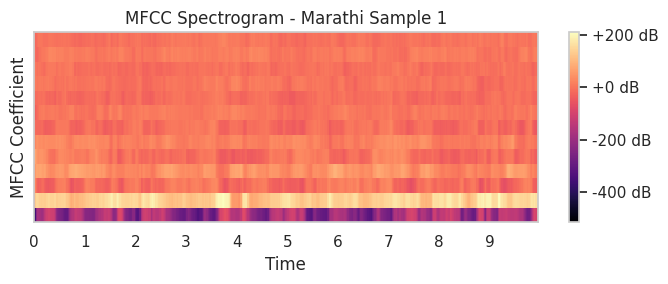

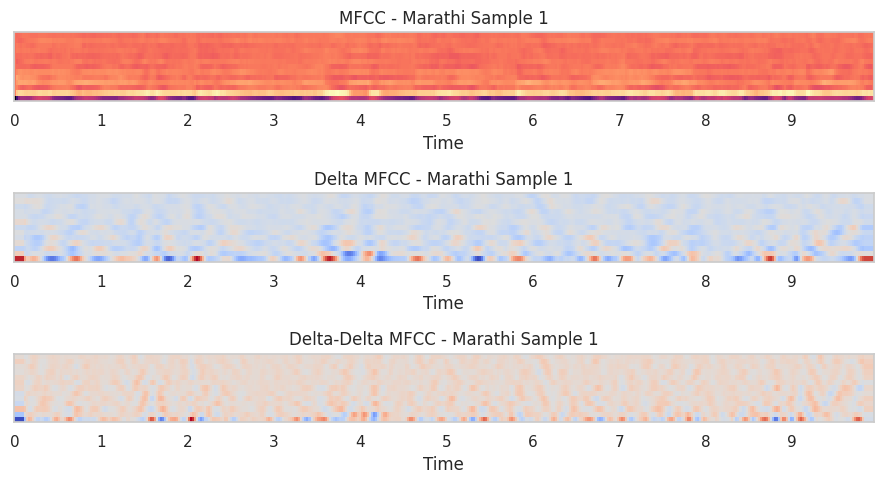

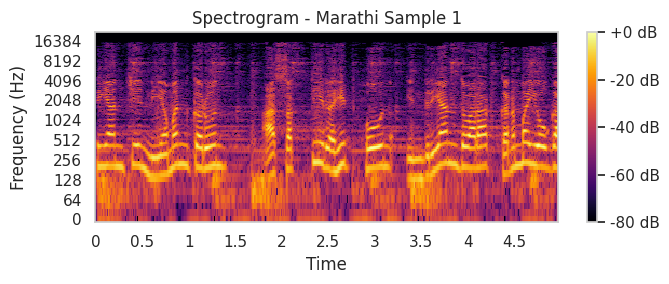

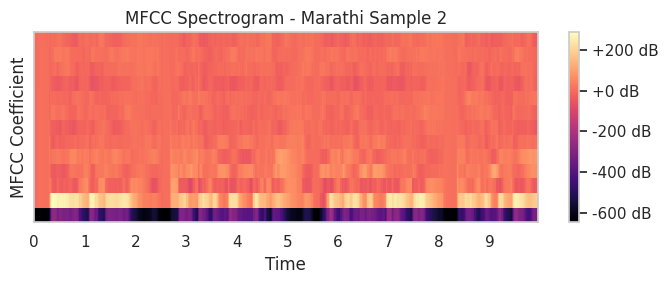

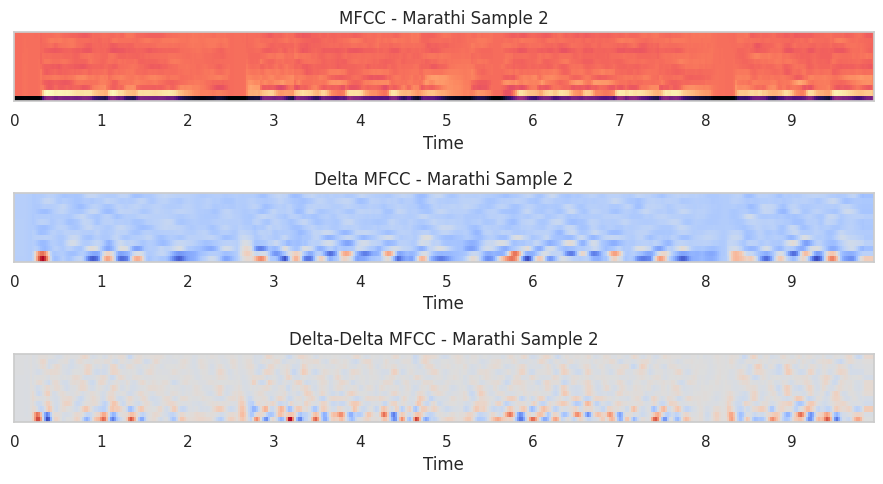

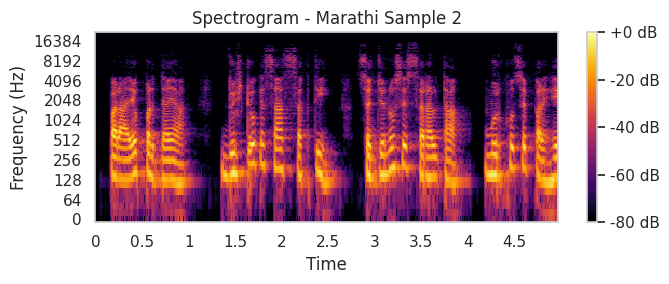

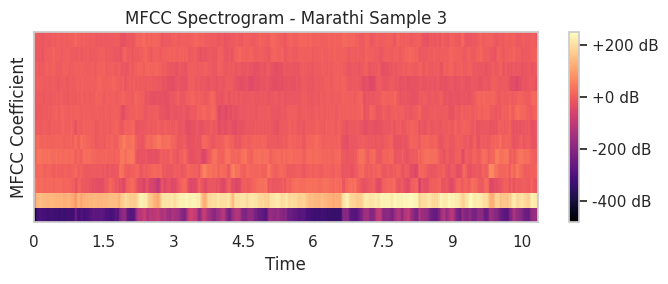

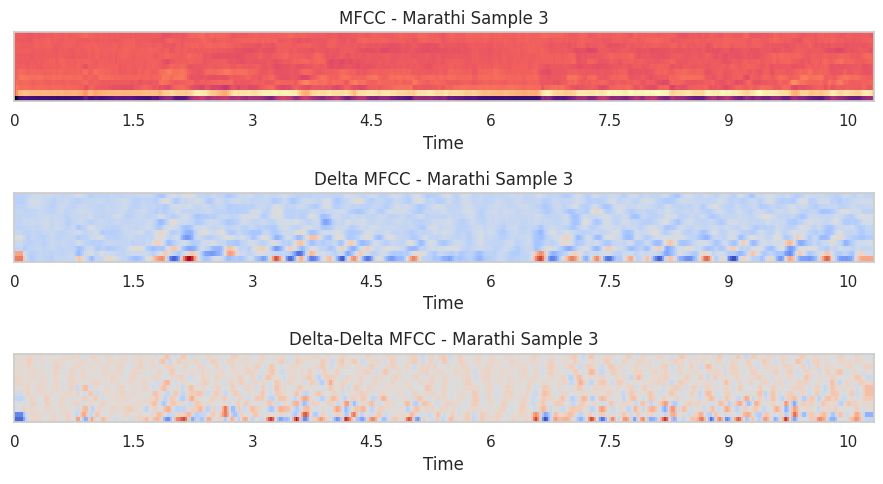

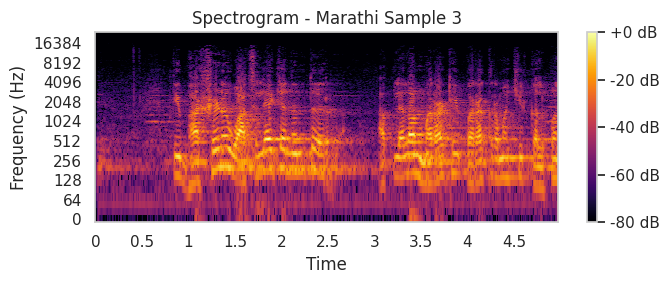

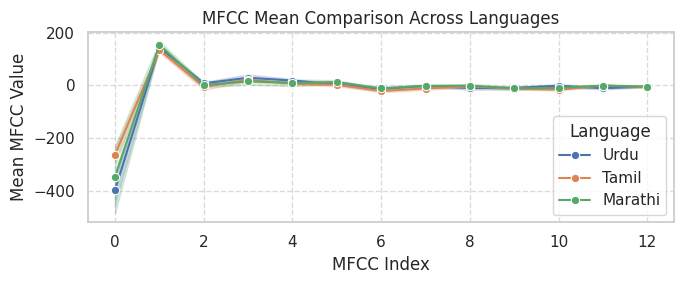

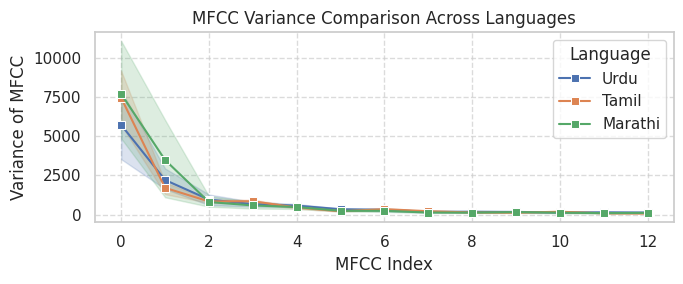

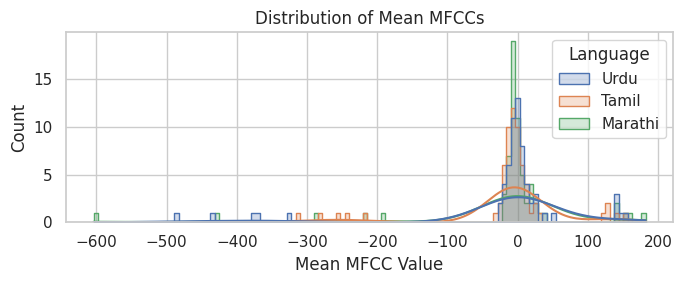

/tmp/ipykernel_669512/1593822618.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=stats_df, x="Language", y="Mean_MFCC", palette="pastel")


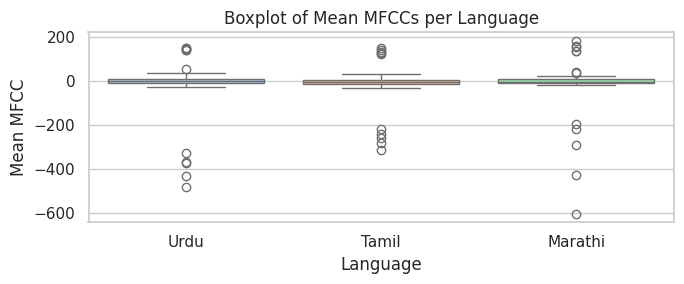

/tmp/ipykernel_669512/1593822618.py:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=stats_df, x="Language", y="Var_MFCC", palette="coolwarm")


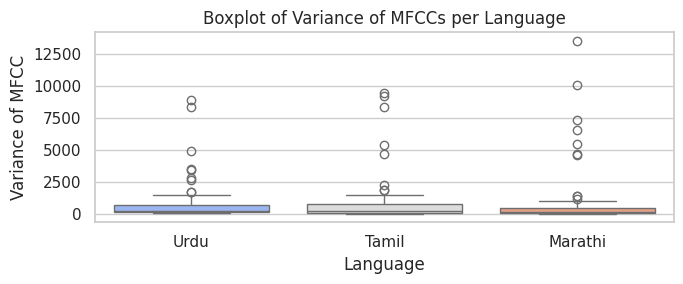

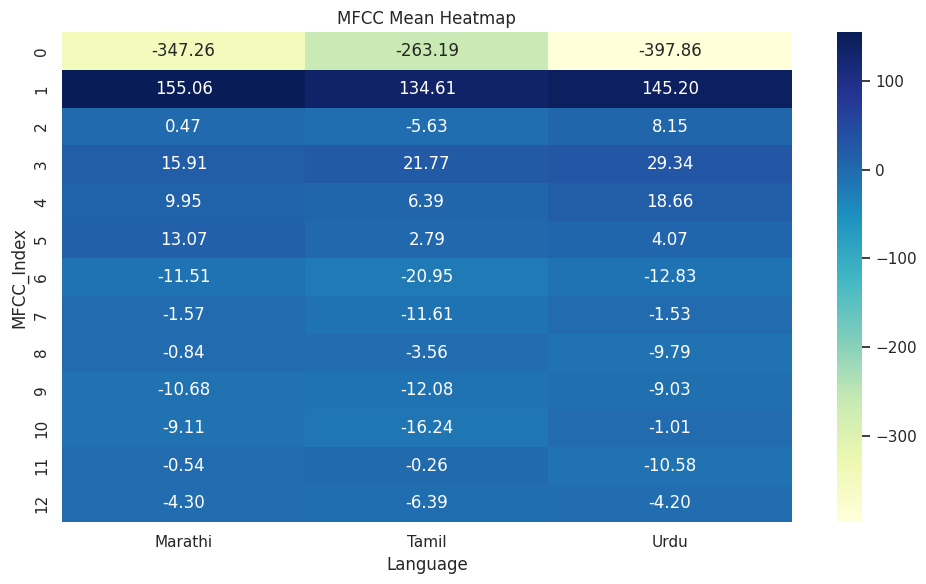

/DATA1/miniconda3/envs/Ques1/lib/python3.13/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


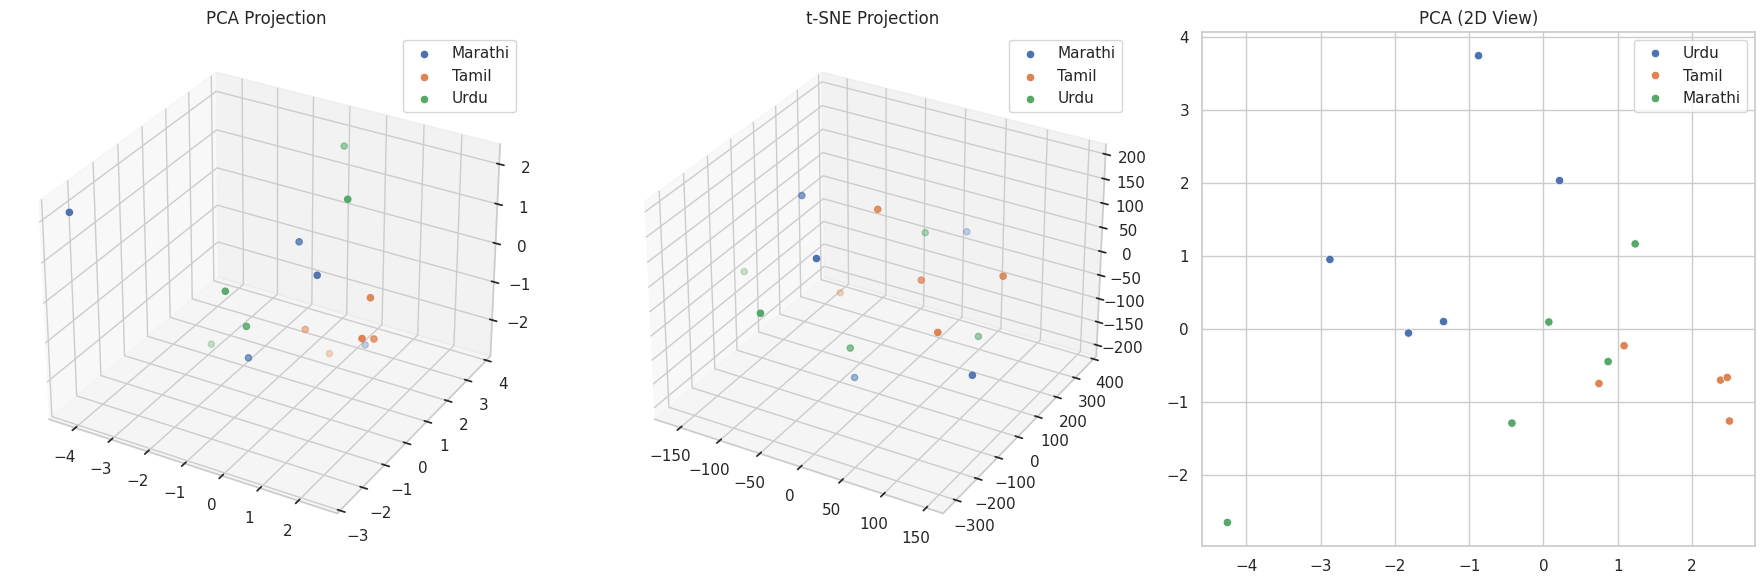

In [1]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

sns.set_theme(style="whitegrid")

# Extract MFCC features from audio
def extract_mfcc(audio_path, n_mfcc=13):
    try:
        y, sr = librosa.load(audio_path, sr=None)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        delta_mfcc = librosa.feature.delta(mfccs)
        delta2_mfcc = librosa.feature.delta(mfccs, order=2)
        spectrogram = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
        return mfccs, delta_mfcc, delta2_mfcc, spectrogram, sr
    except Exception as e:
        print(f"Error processing {audio_path}: {e}")
        return None, None, None, None, None

# Plot MFCCs
def plot_mfcc(mfcc, language, sample_id):
    plt.figure(figsize=(7, 3))
    librosa.display.specshow(mfcc, x_axis='time', cmap='magma')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'MFCC Spectrogram - {language} Sample {sample_id}')
    plt.xlabel('Time')
    plt.ylabel('MFCC Coefficient')
    plt.tight_layout()
    plt.show()

# Plot delta and delta-delta MFCCs
def plot_delta_mfcc(mfcc, delta_mfcc, delta2_mfcc, language, sample_id):
    fig, ax = plt.subplots(3, 1, figsize=(9, 5))
    librosa.display.specshow(mfcc, x_axis='time', cmap='magma', ax=ax[0])
    ax[0].set_title(f'MFCC - {language} Sample {sample_id}')
    librosa.display.specshow(delta_mfcc, x_axis='time', cmap='coolwarm', ax=ax[1])
    ax[1].set_title(f'Delta MFCC - {language} Sample {sample_id}')
    librosa.display.specshow(delta2_mfcc, x_axis='time', cmap='coolwarm', ax=ax[2])
    ax[2].set_title(f'Delta-Delta MFCC - {language} Sample {sample_id}')
    plt.tight_layout()
    plt.show()

# Plot spectrogram
def plot_spectrogram(spectrogram, sr, language, sample_id):
    plt.figure(figsize=(7, 3))
    librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='log', cmap='inferno')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram - {language} Sample {sample_id}')
    plt.xlabel('Time')
    plt.ylabel('Frequency (Hz)')
    plt.tight_layout()
    plt.show()

# Plot mean and variance curves
def plot_mfcc_multiple_curves(stats_df):
    plt.figure(figsize=(7, 3))
    sns.lineplot(data=stats_df, x="MFCC_Index", y="Mean_MFCC", hue="Language", marker="o", linestyle="-")
    plt.title("MFCC Mean Comparison Across Languages")
    plt.xlabel("MFCC Index")
    plt.ylabel("Mean MFCC Value")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(7, 3))
    sns.lineplot(data=stats_df, x="MFCC_Index", y="Var_MFCC", hue="Language", marker="s", linestyle="-")
    plt.title("MFCC Variance Comparison Across Languages")
    plt.xlabel("MFCC Index")
    plt.ylabel("Variance of MFCC")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot histogram
def plot_mfcc_histogram(stats_df):
    plt.figure(figsize=(7, 3))
    sns.histplot(data=stats_df, x="Mean_MFCC", hue="Language", kde=True, element="step")
    plt.title("Distribution of Mean MFCCs")
    plt.xlabel("Mean MFCC Value")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# Plot boxplots

def plot_mfcc_boxplot(stats_df):
    plt.figure(figsize=(7, 3))
    sns.boxplot(data=stats_df, x="Language", y="Mean_MFCC", palette="pastel")
    plt.title("Boxplot of Mean MFCCs per Language")
    plt.xlabel("Language")
    plt.ylabel("Mean MFCC")
    plt.tight_layout()
    plt.show()

def plot_var_mfcc_boxplot(stats_df):
    plt.figure(figsize=(7, 3))
    sns.boxplot(data=stats_df, x="Language", y="Var_MFCC", palette="coolwarm")
    plt.title("Boxplot of Variance of MFCCs per Language")
    plt.xlabel("Language")
    plt.ylabel("Variance of MFCC")
    plt.tight_layout()
    plt.show()

# Plot heatmap
def plot_mfcc_heatmap(stats_df):
    grouped = stats_df.groupby(["MFCC_Index", "Language"]).Mean_MFCC.mean().reset_index()
    heatmap_df = grouped.pivot(index="MFCC_Index", columns="Language", values="Mean_MFCC")
    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_df, annot=True, fmt=".2f", cmap="YlGnBu")
    plt.title("MFCC Mean Heatmap")
    plt.tight_layout()
    plt.show()

# Visualize PCA and t-SNE
def visualize_pca_tsne(mfcc_vectors_df):
    features = mfcc_vectors_df.iloc[:, 2:].values
    labels = mfcc_vectors_df['Language'].values

    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    pca = PCA(n_components=3)
    pca_proj = pca.fit_transform(features_scaled)

    tsne = TSNE(n_components=3, perplexity=5, n_iter=1000, random_state=42)
    tsne_proj = tsne.fit_transform(features_scaled)

    fig = plt.figure(figsize=(18, 6))

    ax1 = fig.add_subplot(131, projection='3d')
    for label in np.unique(labels):
        idx = labels == label
        ax1.scatter(pca_proj[idx, 0], pca_proj[idx, 1], pca_proj[idx, 2], label=label)
    ax1.set_title('PCA Projection')
    ax1.legend()

    ax2 = fig.add_subplot(132, projection='3d')
    for label in np.unique(labels):
        idx = labels == label
        ax2.scatter(tsne_proj[idx, 0], tsne_proj[idx, 1], tsne_proj[idx, 2], label=label)
    ax2.set_title('t-SNE Projection')
    ax2.legend()

    ax3 = fig.add_subplot(133)
    sns.scatterplot(x=pca_proj[:, 0], y=pca_proj[:, 1], hue=labels)
    ax3.set_title('PCA (2D View)')

    plt.tight_layout()
    plt.show()

# Dataset path
dataset_path = 'Language Detection Dataset'
languages = ['Urdu', 'Tamil', 'Marathi']

mfcc_data = []
mfcc_vectors = []

for language in languages:
    lang_path = os.path.join(dataset_path, language)
    if not os.path.exists(lang_path):
        print(f"Directory not found: {lang_path}")
        continue

    sample_files = [f for f in os.listdir(lang_path) if f.endswith('.mp3')][:5]
    if not sample_files:
        print(f"No MP3 files found for: {language}")
        continue

    print(f"\nProcessing language: {language}\n" + "-" * 30)

    for idx, file in enumerate(sample_files):
        file_path = os.path.join(lang_path, file)
        mfcc, delta, delta2, spec, sr = extract_mfcc(file_path)
        if mfcc is None:
            continue

        if idx < 3:
            plot_mfcc(mfcc, language, idx+1)
            plot_delta_mfcc(mfcc, delta, delta2, language, idx+1)
            plot_spectrogram(spec, sr, language, idx+1)

        mean_mfcc = np.mean(mfcc, axis=1)
        var_mfcc = np.var(mfcc, axis=1)

        for i in range(len(mean_mfcc)):
            mfcc_data.append({
                "Language": language,
                "MFCC_Index": i,
                "Mean_MFCC": mean_mfcc[i],
                "Var_MFCC": var_mfcc[i]
            })

        vector_entry = {"Language": language, "Sample": file}
        for i in range(mfcc.shape[0]):
            vector_entry[f"MFCC_{i+1}"] = mean_mfcc[i]
        mfcc_vectors.append(vector_entry)

# DataFrames
stats_df = pd.DataFrame(mfcc_data)
mfcc_vectors_df = pd.DataFrame(mfcc_vectors)

# Visualizations
plot_mfcc_multiple_curves(stats_df)
plot_mfcc_histogram(stats_df)
plot_mfcc_boxplot(stats_df)
plot_var_mfcc_boxplot(stats_df)
plot_mfcc_heatmap(stats_df)
visualize_pca_tsne(mfcc_vectors_df)

Ques-2
Task-B

Error reading Language Detection Dataset/Urdu/5339.mp3: frames must be specified for non-seekable files


/DATA1/miniconda3/envs/Ques1/lib/python3.13/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1105
  warnings.warn(
/DATA1/miniconda3/envs/Ques1/lib/python3.13/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1361
  warnings.warn(


Epoch [10/50], Loss: 1.0266, Val Accuracy: 0.66
Epoch [20/50], Loss: 0.9411, Val Accuracy: 0.73
Epoch [30/50], Loss: 0.8335, Val Accuracy: 0.73
Epoch [40/50], Loss: 0.7214, Val Accuracy: 0.73
Epoch [50/50], Loss: 0.6271, Val Accuracy: 0.75
Training completed.

Test Accuracy: 0.75

Classification Report:
               precision    recall  f1-score   support

        Urdu       0.84      0.56      0.67      2001
       Tamil       0.76      0.89      0.82      2003
     Marathi       0.70      0.81      0.75      2000

    accuracy                           0.75      6004
   macro avg       0.77      0.75      0.75      6004
weighted avg       0.77      0.75      0.75      6004



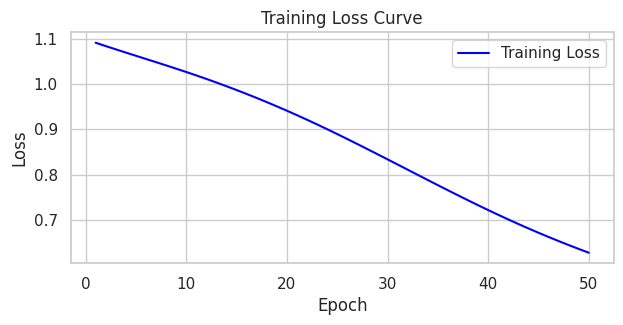

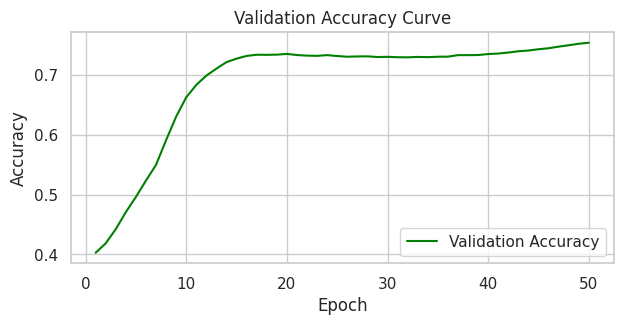

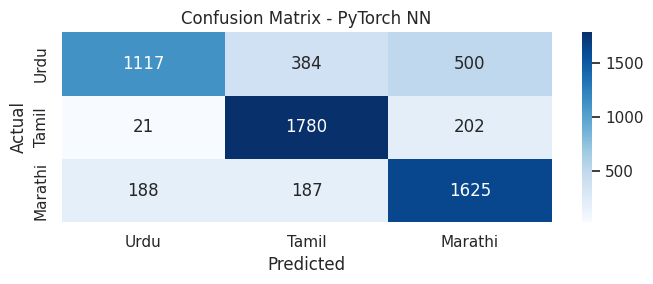

In [4]:
import os
import librosa
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ================= STEP 1: LOAD DATASET AND EXTRACT MFCC =================

dataset_path = "Language Detection Dataset/"
languages = ['Urdu', 'Tamil', 'Marathi']  # Modify based on your dataset structure

def extract_mfcc(audio_path, n_mfcc=13):
    try:
        y, sr = librosa.load(audio_path, sr=None)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        return np.mean(mfccs, axis=1)
    except Exception as e:
        print(f"Error reading {audio_path}: {e}")
        return None

data = []
labels = []
for language in languages:
    lang_path = os.path.join(dataset_path, language)
    
    if not os.path.isdir(lang_path):
        print(f"Directory not found for language: {language}")
        continue

    files = [f for f in os.listdir(lang_path) if f.endswith('.mp3')]
    if not files:
        print(f"No .wav files found for language: {language}")
        continue

    for file in files:
        file_path = os.path.join(lang_path, file)
        mfcc = extract_mfcc(file_path)
        if mfcc is not None:
            data.append(mfcc)
            labels.append(language)

# Convert to DataFrame
if not data:
    raise ValueError("No audio data found. Please check your dataset path and file formats.")

df = pd.DataFrame(data)
df["Language"] = labels
df["Language"] = df["Language"].astype("category").cat.codes

# ================= STEP 2: PREPROCESS DATA =================

X = df.drop(columns=["Language"]).values
y = df["Language"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# ================= STEP 3: DEFINE PYTORCH MODEL =================

class LanguageClassifier(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LanguageClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, num_classes)
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)  # No softmax here — CrossEntropyLoss includes it
        return x

input_size = X_train.shape[1]
num_classes = len(np.unique(y))
model = LanguageClassifier(input_size, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ================= STEP 4: TRAIN THE MODEL WITH TRACKING =================

num_epochs = 50
train_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())  # Store loss

    # Validation accuracy
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test_tensor)
        y_pred_classes = torch.argmax(y_pred, dim=1).numpy()
        accuracy = accuracy_score(y_test, y_pred_classes)
        val_accuracies.append(accuracy)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Accuracy: {accuracy:.2f}")

print("Training completed.")

# ================= STEP 5: EVALUATE THE MODEL =================

model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    y_pred_classes = torch.argmax(y_pred, dim=1).numpy()

accuracy = accuracy_score(y_test, y_pred_classes)
print(f"\nTest Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_classes, target_names=languages))

# ================= STEP 6: VISUALIZE TRAINING CURVES =================

# Plot loss curve
plt.figure(figsize=(7, 3))
plt.plot(range(1, num_epochs + 1), train_losses, label="Training Loss", color="blue")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.show()

# Plot accuracy curve
plt.figure(figsize=(7, 3))
plt.plot(range(1, num_epochs + 1), val_accuracies, label="Validation Accuracy", color="green")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy Curve")
plt.legend()
plt.show()

# ================= STEP 6: VISUALIZE CONFUSION MATRIX =================

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(7, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=languages, yticklabels=languages)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(y_test, y_pred_classes, "PyTorch NN")
